<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div align = "center">
<font color='cyan' size = 14>
AmirHossein Naghi razlighi |
</font>

<font color='green' size = 12>
99102423
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

In [1]:
%pip install torch
%pip install scikit-learn
%pip install transformers

from IPython.display import clear_output
clear_output()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [383]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [384]:
df = pd.read_csv("./arxiv_data.csv")

In [385]:
# Show the first 10 rows of the dataset.
df.head(10)

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
5,EdgeFlow: Achieving Practical Interactive Segm...,High-quality training data play a key role in ...,"['cs.CV', 'cs.HC']"
6,Efficient Hybrid Transformer: Learning Global-...,Semantic segmentation of fine-resolution urban...,['cs.CV']
7,Towards to Robust and Generalized Medical Imag...,"To mitigate the radiologist's workload, comput...","['cs.CV', 'cs.AI']"
8,Semi-supervised Meta-learning with Disentangle...,Generalising deep models to new data from new ...,['cs.CV']
9,Semi-supervised Contrastive Learning for Label...,The success of deep learning methods in medica...,['cs.CV']


In [386]:
# Show the headers of the dataset.
df.columns

Index(['titles', 'summaries', 'terms'], dtype='object')

In [387]:
# Show the number of rows and columns of the dataset
df.shape

(51774, 3)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [388]:
# reduce the size of dataset so naive bayes can run
df = df.sample(frac=0.2, random_state=1)

In [389]:
df.head(10)

,titles,summaries,terms
931,Self-Learning to Detect and Segment Cysts in L...,Image segmentation is a fundamental problem in...,['cs.CV']
40820,Online trajectory recovery from offline handwr...,"In general, it is straightforward to render an...","['cs.CV', 'cs.LG']"
8930,SpotPatch: Parameter-Efficient Transfer Learni...,Deep learning based object detectors are commo...,['cs.CV']
46601,Understanding the role of importance weighting...,"The recent paper by Byrd & Lipton (2019), base...",['cs.LG']
13852,Towards Differentiable Resampling,Resampling is a key component of sample-based ...,"['cs.LG', 'cs.RO', 'stat.ML']"
43241,Variational approximations using Fisher diverg...,Modern applications of Bayesian inference invo...,"['stat.ML', 'cs.LG', 'stat.CO', 'stat.ME']"
15644,Learning to Simulate Dynamic Environments with...,Simulation is a crucial component of any robot...,['cs.CV']
14205,Communication-efficient distributed SGD with S...,Large-scale distributed training of neural net...,"['cs.LG', 'cs.DC', 'math.OC', 'stat.ML']"
23277,Multilayer Clustered Graph Learning,Multilayer graphs are appealing mathematical t...,['cs.LG']
26855,Sparse + Low Rank Decomposition of Annihilatin...,"Recently, so called annihilating filer-based l...",['cs.CV']


In [390]:
df.shape

(10355, 3)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [12]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirhossein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [391]:
def preprocess_text(
    text,
    minimum_length=1,
    stopword_removal=True,
    stopwords_domain=[],
    lower_case=True,
    punctuation_removal=True,
):
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words("english")]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [
            word
            for word in normalized_tokens
            if word.lower() not in domain_stopwords + stopwords
        ]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [
            word for word in normalized_tokens if word not in string.punctuation
        ]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [
            word.lower() for word in normalized_tokens if len(word) > minimum_length
        ]
    else:
        normalized_tokens = [
            word for word in normalized_tokens if len(word) > minimum_length
        ]

    return normalized_tokens

In [392]:
# pre_process the title and summaries of the dataframe

df["titles"] = df["titles"].apply(preprocess_text)
df["summaries"] = df["summaries"].apply(preprocess_text)
# set the terms (they are in form of '[a.b, c.d]') to a list of terms
df["terms"] = df["terms"].apply(lambda x: x[1:-1].split(", "))

In [393]:
df.head(10)

,titles,summaries,terms
931,"[self-learning, detect, segment, cysts, lung, ...","[image, segmentation, fundamental, problem, me...",['cs.CV']
40820,"[online, trajectory, recovery, offline, handwr...","[general, straightforward, render, offline, ha...","['cs.CV', 'cs.LG']"
8930,"[spotpatch, parameter-efficient, transfer, lea...","[deep, learning, based, object, detectors, com...",['cs.CV']
46601,"[understanding, role, importance, weighting, d...","[recent, paper, byrd, lipton, 2019, based, emp...",['cs.LG']
13852,"[towards, differentiable, resampling]","[resampling, key, component, sample-based, rec...","['cs.LG', 'cs.RO', 'stat.ML']"
43241,"[variational, approximations, using, fisher, d...","[modern, applications, bayesian, inference, in...","['stat.ML', 'cs.LG', 'stat.CO', 'stat.ME']"
15644,"[learning, simulate, dynamic, environments, ga...","[simulation, crucial, component, robotic, syst...",['cs.CV']
14205,"[communication-efficient, distributed, sgd, sk...","[large-scale, distributed, training, neural, n...","['cs.LG', 'cs.DC', 'math.OC', 'stat.ML']"
23277,"[multilayer, clustered, graph, learning]","[multilayer, graphs, appealing, mathematical, ...",['cs.LG']
26855,"[sparse, low, rank, decomposition, annihilatin...","[recently, called, annihilating, filer-based, ...",['cs.CV']


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [394]:
# TODO
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
joined = df["titles"] + df["summaries"]
joined = joined.apply(lambda x: " ".join(x))
word_count_vector = cv.fit_transform(joined)

word_count_vector.shape

(10355, 29807)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaiveBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [395]:
from tqdm import tqdm

In [435]:
def softmax_calculation(x):
    x = x - np.max(x)
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x)
    return softmax_x

In [436]:
class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha

    def fit(self, x, y):
        """
        Fit the features and the labels
        Calculate prior, word_counts and lk_word

        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc

        Returns
        -------
        self
            Returns self as a classifier
        """
        # TODO
        self.prior = {}
        self.word_counts = {}
        self.lk_word = {}
        y_modified = np.copy(y)

        # If y label is a list, set the label to the first element
        for i in range(len(y_modified)):
            if type(y_modified[i]) == list:
                y_modified[i] = y_modified[i][0]

        # Get unique labels
        self.labels = np.unique(y_modified)
        print(self.labels)

        # Calculate prior probabilities
        for label in tqdm(self.labels):
            self.prior[label] = np.sum(y_modified == label) / len(y_modified)

        # Initialize word counts and likelihood probabilities dictionaries
        for label in tqdm(self.labels):
            self.word_counts[label] = np.zeros(x.shape[1])
            self.lk_word[label] = np.zeros(x.shape[1])

        # Update word counts for each class
        for label in tqdm(self.labels):
            for doc in x[y_modified == label]:
                self.word_counts[label] += doc

        # Calculate likelihood probabilities with Laplace smoothing
        for label in tqdm(self.labels):
            self.lk_word[label] = (self.word_counts[label] + self.alpha) / (
                np.sum(self.word_counts[label]) + self.alpha * x.shape[1]
            )

        return self

    def predict(self, x):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count
            of docs and n is vocabulary size

        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        """

        # TODO (use tqdm to show progress bar)
        # make it as fast as possible
        # Hint: use np.log to avoid underflow
        predictions = []
        probs = []

        for doc in tqdm(x):
            pred = []
            for label in self.labels:
                pred.append(
                    np.log(self.prior[label])
                    + np.sum(np.log(self.lk_word[label]) * doc)
                )
            predictions.append(self.labels[np.argmax(pred)])
            probs.append(softmax_calculation(pred))

        return np.array(predictions), np.array(probs)

    def get_params(self, deep=True):
        return {"alpha": self.alpha}

In [437]:
# use your classifier to fit on the training data
# then try to predict classes of test data

# TODO
X_train, X_test, y_train, y_test = train_test_split(
    word_count_vector, df["terms"], test_size=0.1, random_state=1
)

nb = NaiveBayes()
nb.fit(X_train.toarray(), y_train)

["'cs.CV'" "'cs.LG'" "'stat.ML'"]


100%|██████████| 3/3 [00:00<00:00, 3653.57it/s]


In [438]:
y_pred, probs = nb.predict(X_test.toarray())

100%|██████████| 1036/1036 [00:00<00:00, 2922.39it/s]


In [439]:
# print some test labels vs predicted labels
for i in range(10):
    print(f"Actual: {y_test.iloc[i]} , Predicted: {y_pred[i]}")

Actual: ["'cs.CV'", "'eess.SP'"] , Predicted: 'cs.CV'
Actual: ["'cs.LG'", "'math.OC'"] , Predicted: 'cs.LG'
Actual: ["'cs.CV'"] , Predicted: 'cs.CV'
Actual: ["'cs.LG'", "'cs.NE'", "'stat.ML'"] , Predicted: 'cs.LG'
Actual: ["'cs.LG'"] , Predicted: 'cs.LG'
Actual: ["'cs.CV'"] , Predicted: 'cs.CV'
Actual: ["'cs.LG'", "'cs.CV'", "'stat.ML'"] , Predicted: 'cs.CV'
Actual: ["'cs.CV'"] , Predicted: 'cs.CV'
Actual: ["'cs.LG'", "'cs.CR'", "'stat.ML'"] , Predicted: 'cs.LG'
Actual: ["'cs.CV'"] , Predicted: 'cs.CV'


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [440]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# make y_test as like as y copy in the last cell (1st label)
y_test_modified = np.copy(y_test)
for i in range(len(y_test_modified)):
    if type(y_test_modified[i]) == list:
        y_test_modified[i] = y_test_modified[i][0]

# TODO
print(f"Accuracy is {accuracy_score(y_test_modified, y_pred)}")
print(f"Recall(macro) is {recall_score(y_test_modified, y_pred, average='macro')}")
print(f"Recall(micro) is {recall_score(y_test_modified, y_pred, average='micro')}")
print(
    f"Precision(macro) is {precision_score(y_test_modified, y_pred, average='macro')}"
)
print(
    f"Precision(micro) is {precision_score(y_test_modified, y_pred, average='micro')}"
)
print(f"F1(macro) is {f1_score(y_test_modified, y_pred, average='macro')}")
print(f"F1(micro) is {f1_score(y_test_modified, y_pred, average='micro')}")

Accuracy is 0.8793436293436293
Recall(macro) is 0.6816486465761828
Recall(micro) is 0.8793436293436293
Precision(macro) is 0.7540515927223773
Precision(micro) is 0.8793436293436293
F1(macro) is 0.6980808829585702
F1(micro) is 0.8793436293436293


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

In [462]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_true = LabelEncoder().fit_transform(y_test_modified)


print(f"ROC AUC score is {roc_auc_score(y_true, probs, multi_class='ovr')}")

ROC AUC score is 0.9457452964863159


<Figure size 640x480 with 0 Axes>

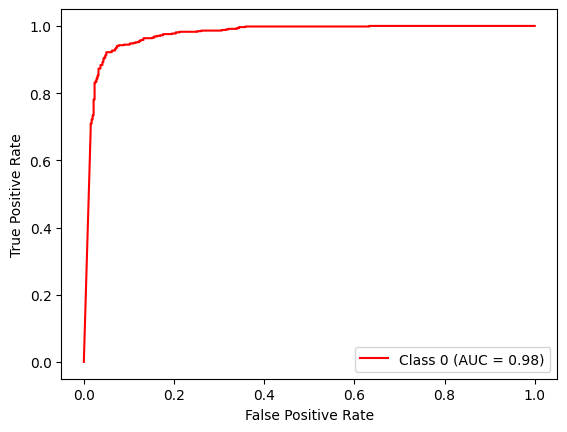

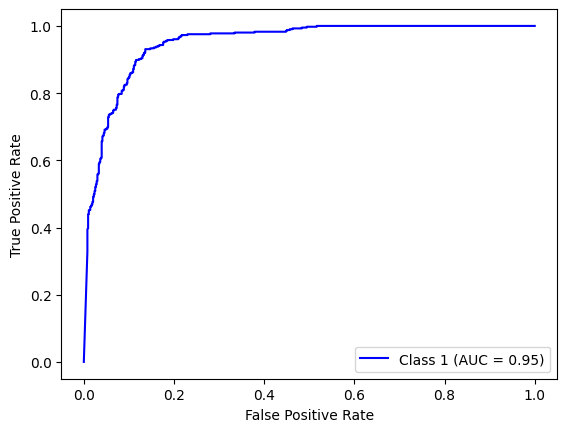

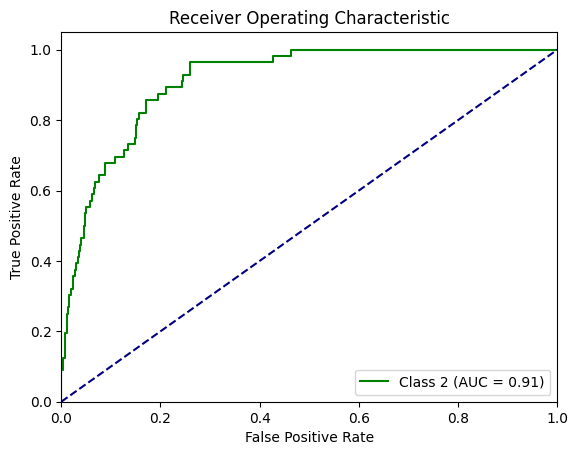

In [467]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

lb = LabelBinarizer()
y_test_transformed = lb.fit_transform(y_test_modified)

n_classes = y_test_transformed.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_transformed[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = cycle(["red", "blue", "green"])  # You can add more colors if needed
for i, color in zip(range(n_classes), colors):
    roc_display = RocCurveDisplay(
        fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f"Class {i}"
    ).plot(color=color)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

_Explanation_:

These plots show that the classifier does good at predicting classes from `class_0` better than the other two classes. This is maybe because the number of samples in `class_0` is much more than the other two classes. So, the classifier is biased towards `class_0` and does not perform well on the other two classes. But this bias is not significant as you can see. Also, we can see the ROC curves (using `one vs rest` method) for each class. The ROC curve for `class_0` is above the other two classes which means that the classifier is better at predicting `class_0` than the other two classes. 

Also, the ROC curve for `class_1` is above the ROC curve for `class_2` which means that the classifier is better at predicting `class_1` than `class_2`. Also we can see the ratio of $\frac{true\_positive}{false\_positive}$.

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

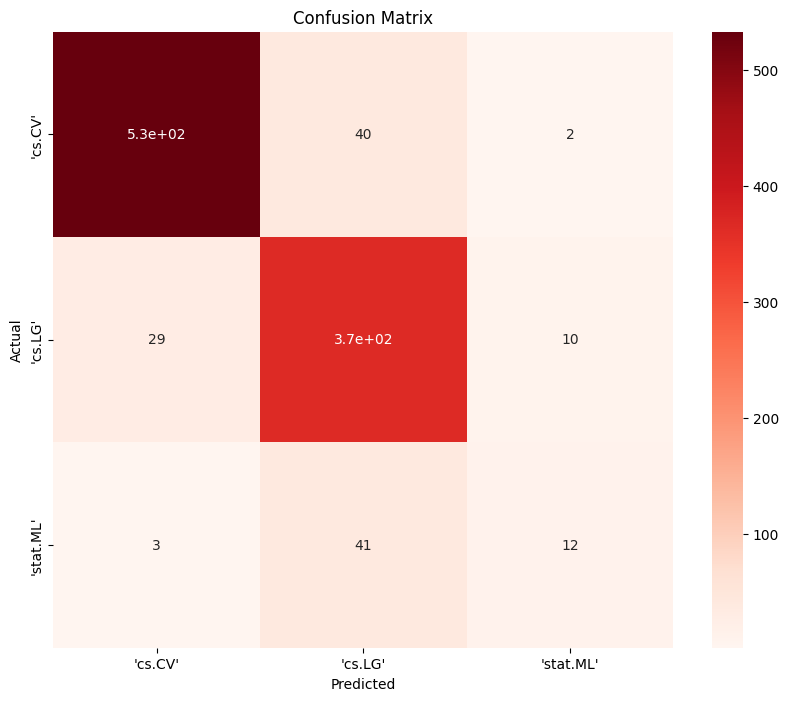

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO confusion matrix without importing confusion_matrix from sklearn.metrics


def create_confusion_matrix(y_test, y_pred, labels):
    """
    Parameters
    ----------
    y_test: np.ndarray
        The real class label for each doc

    y_pred: np.ndarray
        The predicted class label for each doc

    labels: np.ndarray
        The unique class labels

    Returns
    -------
    np.ndarray
        The confusion matrix
    """
    confusion_matrix = np.zeros((len(labels), len(labels)))
    for i in range(len(y_test)):
        confusion_matrix[
            np.where(labels == y_test[i]), np.where(labels == y_pred[i])
        ] += 1
    return confusion_matrix


confusion_matrix = create_confusion_matrix(y_test_modified, y_pred, nb.labels)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    cmap="Reds",
    xticklabels=nb.labels,
    yticklabels=nb.labels,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [2]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [50]:
# read data
df = pd.read_csv("./arxiv_data.csv")

In [51]:
df["terms"] = df["terms"].apply(lambda x: x[1:-1].split(", "))

In [52]:
def clean_data(text : str):
    """Preprocesses the text with tokenization, case folding, stemming and lemmatization, and punctuations

    Parameters
    ----------
    text : str
        The title or abstract of an article

    Returns
    -------
    list
        A list of tokens
    """

    # TODO: tokenize, case_folding, stem, lemmatize, punctuations
    tokenized = nltk.word_tokenize(text)
    case_folded = [word.lower() for word in tokenized]
    stemmer = nltk.stem.PorterStemmer()
    stemmed = [stemmer.stem(word) for word in case_folded]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    punctuations = [word for word in lemmatized if word.isalpha()]
    return punctuations

clean_data("An abstract is a summary of the main article.") # return ["an", "abstract", "is", "a", "summary", "of", "the", "main", "article"]

['an', 'abstract', 'is', 'a', 'summari', 'of', 'the', 'main', 'articl']

In [53]:
## 2 points

def find_stop_words(all_text : list[str], num_token=30):
    """Detects stop-words

     Parameters
    ----------
    all_text : list of all tokens
        (result of clean_data(text) for all the text)

    Returns
    -------
    Return Value is optional but must print the stop words and number of their occurence
    """

    # TODO: find num_token top most repetitive terms and report them
    freq_dist = nltk.FreqDist()
    for text in all_text:
        for word in text:
            freq_dist[word] += 1
    
    most_commons = freq_dist.most_common(num_token)
    print(most_commons)

    return most_commons
    
test = [
    ["an", "abstract", "is", "a", "summary", "of", "the", "main", "article"],
    ["hello", "world", "is", "the", "most", "common", "phrase", "in", "the", "world"],
]

find_stop_words(test)

[('the', 3), ('is', 2), ('world', 2), ('an', 1), ('abstract', 1), ('a', 1), ('summary', 1), ('of', 1), ('main', 1), ('article', 1), ('hello', 1), ('most', 1), ('common', 1), ('phrase', 1), ('in', 1)]


[('the', 3),
 ('is', 2),
 ('world', 2),
 ('an', 1),
 ('abstract', 1),
 ('a', 1),
 ('summary', 1),
 ('of', 1),
 ('main', 1),
 ('article', 1),
 ('hello', 1),
 ('most', 1),
 ('common', 1),
 ('phrase', 1),
 ('in', 1)]

In [54]:
# perform data cleaning and eda (you can add cells here)
# todo

df["titles"] = df["titles"].fillna("")
df["summaries"] = df["summaries"].fillna("")

original_df = df.copy()

In [55]:
def preprocess_text(
    text,
    minimum_length=1,
    stopword_removal=True,
    stopwords_domain=[],
    lower_case=True,
    punctuation_removal=True,
):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    # todo
    tokenized = nltk.word_tokenize(text)
    if lower_case:
        tokenized = [word.lower() for word in tokenized]
    if stopword_removal:
        stop_words = nltk.corpus.stopwords.words("english")
        tokenized = [word for word in tokenized if word not in stop_words]
    if punctuation_removal:
        tokenized = [word for word in tokenized if word not in string.punctuation]
    if minimum_length:
        tokenized = [word for word in tokenized if len(word) >= minimum_length]
    return tokenized


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [56]:
# preprocess text
df["preprocessed_abstract"] = df["summaries"].apply(lambda x: preprocess_text(x))
df["preprocessed_title"] = df["titles"].apply(lambda x: preprocess_text(x))
preprocessed_total = df["preprocessed_abstract"] + df["preprocessed_title"]

  0%|          | 0/3885 [07:49<?, ?it/s]


In [57]:
preprocessed_total[0][:5]

['stereo', 'matching', 'one', 'widely', 'used']

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [11]:
class FastText:
    def __init__(self, preprocessor=None, method="skipgram"):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        # todo
        if self.preprocessor:
            for text in texts:
                text = [self.preprocessor(word) for word in text]
            print("Preprocessing done!")

        print("Training model...")
        if self.method == "skipgram":
            self.model = fasttext.train_unsupervised(texts, model="skipgram")
        elif self.method == "cbow":
            self.model = fasttext.train_unsupervised(texts, model="cbow")
        else:
            raise ValueError("Method must be either skipgram or cbow")
        print("Training done!")

    def get_word_embedding(self, word):
        """
        get the embedding of a word
        Parameters
        ----------
        word: str
        Returns embedding of the word
        """
        # todo
        embedding = self.model.get_word_vector(word)
        return embedding

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # todo
        if self.preprocessor:
            query = self.preprocessor(query)
        query_embed = np.zeros((1, 100))
        for word in query:
            if word in tf_idf_vectorizer.vocabulary_:
                word_embed = self.get_word_embedding(word)
                word_weight = tf_idf_vectorizer.idf_[
                    tf_idf_vectorizer.vocabulary_[word]
                ]
                query_embed += word_embed * word_weight
        return query_embed

    def save_FastText_model(self, path="FastText_model.bin"):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == "train":
            self.train(dataset)
        if mode == "load":
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [12]:
FastText_model = FastText(preprocessor=preprocess_text)

In [13]:
# Save the pandas series to a txt file
text_list = preprocessed_total.tolist()

with open("preprocessed_total.txt", "w") as f:
    for item in text_list:
        f.write(" ".join(item) + "\n")

In [14]:
# FastText_model.prepare("./preprocessed_total.txt", mode="train", save=True)
FastText_model.prepare(preprocessed_total, mode='load')

In [15]:
text = "covid"

FastText_model.model.get_nearest_neighbors(text)

[(0.8873776793479919, 'covid-19'),
 (0.8581413626670837, 'covid19'),
 (0.8046349287033081, 'dr-covid'),
 (0.7988560795783997, 'pandemic'),
 (0.7684428691864014, 'pandemics'),
 (0.747352659702301, 'outbreak'),
 (0.7317118048667908, 'endemic'),
 (0.7267407774925232, 'outbreaks'),
 (0.7000961303710938, 'hypoxemia'),
 (0.6973095536231995, 'covid-related')]

In [16]:
class TF_IDF:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        # todo
        flattened_data = [" ".join(text) for text in data]
        self.vectorizer.fit(flattened_data)
        return self

In [17]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [18]:
text = "backpropagation is good"
TF_IDF_model.vectorizer.transform([" ".join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([[ 1.61460665, -1.65360045,  1.26062871,  0.08732843, -0.18338009,
        -1.50571329, -0.67883593,  1.72764868,  2.60821217,  0.61810635,
        -3.3838394 ,  1.27166542,  0.57148305,  0.73514611,  2.1740703 ,
         0.17366932,  1.7059285 ,  1.24747679,  0.90337786,  3.79671943,
        -2.70416868,  0.98618379,  0.41615663,  5.40333533,  1.13975252,
        -1.67530316, -1.94843012,  3.55183524,  1.31366718,  0.85241711,
        -1.48689598,  3.29364064, -1.22943958, -2.93269956, -2.36275935,
        -2.41381866, -0.4318797 ,  6.05777764, -0.56127417, -2.50565684,
        -2.51067221,  1.78529689,  4.72935292,  1.66308981, -0.07644829,
        -4.83382249,  5.48113728,  2.67239267, -1.93812156,  3.46176714,
         0.38868949, -3.84364295, -3.76700035, -0.86432794, -2.4627789 ,
        -0.53371342,  2.73459846,  3.11285448,  2.92089325, -1.50960928,
        -0.16807449,  1.65387893,  1.92404107,  2.52339655,  3.09710598,
        -1.13881099,  3.87948191, -4.5551585 , -4.2


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [58]:
# TODO

from enum import Enum


class LABELS(Enum):
    """
    Enum class for labels
    "'cs.CV'" "'cs.LG'" "'stat.ML'"
    """
    CS_CV = 0
    CS_LG = 1
    STAT_ML = 2

In [22]:
loaded = False
# if embeddings.npy exists, load it
if os.path.exists("embeddings.npy"):
    embeddings = np.load("embeddings.npy")
    print("Embeddings loaded!")
    loaded = True

Embeddings loaded!


In [ ]:
# Make the input data of NN ready using TF-IDF and FastText. It means foreach document, get respective embedding.

# get the embedding of each document
embeddings = []
for text in tqdm(preprocessed_total):
    text = " ".join(text)
    embedding = FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)
    embeddings.append(embedding)

# convert the list of embeddings to a numpy array
embeddings = np.array(embeddings)

In [23]:
embeddings[:5]

array([[[ 8.78551499e+01, -1.06131185e+02,  3.02712650e+01,
          6.02960014e+01,  1.11076447e+02, -6.70212874e+01,
         -1.60198979e+02, -5.41515973e+01,  8.81388549e+01,
         -5.88270506e+01, -7.06074292e+00,  6.51722346e+01,
          5.02895832e+01, -6.59125542e+01,  6.47233428e+01,
         -3.52074872e+01,  4.90375966e+01,  1.92551380e+01,
         -4.37161680e+01,  1.66898828e+02,  2.26485435e+01,
          4.59685988e+01, -3.26242339e+01,  4.15716421e+01,
         -7.08530312e+01,  2.49264485e+00, -1.09773633e+02,
          6.03044928e+01, -3.99790597e+01, -5.92568052e+01,
         -4.29243384e+01,  7.67956939e+01,  3.76797888e+00,
         -6.62259360e+01, -3.87901779e+01, -1.06926248e+01,
         -2.71896294e+01,  8.45528371e+01, -9.83527103e+01,
          1.87017189e+01,  2.13847090e+01,  2.50679177e+01,
         -2.31809441e+00,  9.58921893e+01, -4.63897166e-01,
         -7.92668325e+00,  4.38404940e+01, -3.94593304e+01,
         -3.04534141e+01,  2.23607283e+0

In [206]:
y = df["terms"].values
y_modified = np.copy(y)


# If y label is a list, set the label to the first element
for i in range(len(y_modified)):
    if type(y_modified[i]) == list:
        y_modified[i] = y_modified[i][0]

# Convert the labels to numbers
labels = []
for label in y_modified:
    if label == "'cs.CV'":
        labels.append(LABELS.CS_CV.value)
    elif label == "'cs.LG'":
        labels.append(LABELS.CS_LG.value)
    elif label == "'stat.ML'":
        labels.append(LABELS.STAT_ML.value)
    else:
        raise ValueError("Label is not valid")

labels = torch.tensor(labels)

In [25]:
# save the embeddings to a file
if not loaded:
    np.save("embeddings.npy", embeddings)
    print("Embeddings saved!")

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [25]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        # todo
        self.embeddings = embeddings
        self.labels = labels
        self.length = len(self.embeddings)

    def __len__(self):
        # todo
        return self.length

    def __getitem__(self, i):
        # todo
        return self.embeddings[i], self.labels[i]

In [207]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder().fit_transform(labels)
labels

array([0, 0, 0, ..., 2, 0, 2])

In [27]:
dataset = PapersDataSet(embeddings, labels)

# split the dataset to train and test
train_size = int(0.8 * len(dataset))
validation_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - validation_size

train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, validation_size, test_size]
)

# Calculate the labels. Respective label to each embedding in the dataset. use LABELS enum class
train_labels = [label for _, label in train_dataset]
validation_labels = [label for _, label in validation_dataset]
test_labels = [label for _, label in test_dataset]

In [28]:
# todo split the data into train, val, test and create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [50]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        # todo
        super(ClassifierModel, self).__init__()
        self.fc1 = nn.Linear(in_features, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(32, num_classes)
        self.model = nn.Sequential(
            self.fc1,
            self.bn1,
            self.dropout1,
            self.relu,
            self.fc2,
            self.bn2,
            self.dropout2,
            self.relu,
            self.fc3,
        )

    def forward(self, x):
        # todo
        return self.model(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [51]:
device = torch.device(
    "mps"
    if torch.backends.mps.is_available()
    else "cuda:0"
    if torch.cuda.is_available()
    else "cpu"
)
model = ClassifierModel().to(device)
print(f"device is {device}")
print("Model Architecture:")
print(model)

device is mps
Model Architecture:
ClassifierModel(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (model): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.5, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=3, bias=T

In [52]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
def eval_epoch(
    model: nn.Module,
    criterion: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    test_mode=False,
):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    # todo
    if test_mode:
        print("Test")
    else:
        print("Validation")

    model.eval()
    eval_loss = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(torch.float32).to(device).view(inputs.shape[0], -1)
            labels = labels.to(device)
            outputs = model(inputs)
            eval_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            predicted_labels.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    eval_loss /= len(dataloader)

    f1_score_macro = f1_score(true_labels, predicted_labels, average="macro")

    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [54]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores_train, f1_macro_scores_val = [], []
best_val_loss = np.inf
best_model = None

for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    predicted_labels = []
    true_labels = []

    model.train()

    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            optimizer.zero_grad()
            x = x.to(torch.float32).to(device).view(x.shape[0], -1)
            label = label.to(device)
            y_pred = model(x)
            loss = criterion(y_pred, label)
            loss.backward()
            _, preds = torch.max(y_pred, dim=1)
            optimizer.step()
            train_loss += loss.item() * x.size(0)

            predicted_labels.extend(preds.tolist())
            true_labels.extend(label.tolist())

    model.eval()
    f1_score_macro_train = f1_score(true_labels, predicted_labels, average="macro")
    val_loss, predicted_labels, true_labels, f1_score_macro_val = eval_epoch(
        model, criterion, val_loader
    )

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores_train.append(f1_score_macro_train)
    f1_macro_scores_val.append(f1_score_macro_val)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model
        torch.save(model.state_dict(), "best_model.pt")

    end_time = time()

    print(f"Epoch {epoch + 1} finished in {end_time - start_time:.2f}s")

    print(
        f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.5f}\t"
        f"Validation Loss: {val_loss:.5f}\t F1 score macro: {f1_score_macro:.6f}"
    )

100%|██████████| 648/648 [00:05<00:00, 123.60it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 412.48it/s]


Epoch 1 finished in 5.47s
[Epoch 1]	Train Loss: 0.47789	Validation Loss: 0.00007	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 125.21it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 408.86it/s]


Epoch 2 finished in 5.40s
[Epoch 2]	Train Loss: 0.39897	Validation Loss: 0.00007	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 123.53it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 387.67it/s]


Epoch 3 finished in 5.49s
[Epoch 3]	Train Loss: 0.38983	Validation Loss: 0.00007	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 126.42it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 405.26it/s]


Epoch 4 finished in 5.35s
[Epoch 4]	Train Loss: 0.38405	Validation Loss: 0.00007	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.72it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 416.11it/s]

Epoch 5 finished in 5.30s


[Epoch 5]	Train Loss: 0.37916	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 128.23it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 414.24it/s]


Epoch 6 finished in 5.28s
[Epoch 6]	Train Loss: 0.37252	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.98it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 416.01it/s]

Epoch 7 finished in 5.29s


[Epoch 7]	Train Loss: 0.37109	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 122.42it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 326.36it/s]


Epoch 8 finished in 5.57s
[Epoch 8]	Train Loss: 0.37181	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:06<00:00, 107.40it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 313.20it/s]


Epoch 9 finished in 6.33s
[Epoch 9]	Train Loss: 0.36494	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.61it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 437.12it/s]


Epoch 10 finished in 5.29s
[Epoch 10]	Train Loss: 0.36617	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 128.60it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 437.66it/s]


Epoch 11 finished in 5.26s
[Epoch 11]	Train Loss: 0.36553	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 110.16it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 237.55it/s]


Epoch 12 finished in 6.25s
[Epoch 12]	Train Loss: 0.35937	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:06<00:00, 103.15it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 290.82it/s]


Epoch 13 finished in 6.59s
[Epoch 13]	Train Loss: 0.35969	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 111.47it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 392.74it/s]


Epoch 14 finished in 6.05s
[Epoch 14]	Train Loss: 0.35929	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 117.59it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 411.84it/s]


Epoch 15 finished in 5.73s
[Epoch 15]	Train Loss: 0.35814	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 115.70it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 259.04it/s]


Epoch 16 finished in 5.95s
[Epoch 16]	Train Loss: 0.35740	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 110.38it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 434.65it/s]


Epoch 17 finished in 6.08s
[Epoch 17]	Train Loss: 0.35492	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 125.19it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 437.95it/s]


Epoch 18 finished in 5.39s
[Epoch 18]	Train Loss: 0.35619	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 124.68it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 407.60it/s]


Epoch 19 finished in 5.42s
[Epoch 19]	Train Loss: 0.35728	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 125.83it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 452.66it/s]


Epoch 20 finished in 5.36s
[Epoch 20]	Train Loss: 0.35173	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.46it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 446.85it/s]


Epoch 21 finished in 5.30s
[Epoch 21]	Train Loss: 0.35373	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 120.54it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 433.20it/s]


Epoch 22 finished in 5.60s
[Epoch 22]	Train Loss: 0.35348	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 115.89it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 254.06it/s]


Epoch 23 finished in 5.94s
[Epoch 23]	Train Loss: 0.35214	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 124.39it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 432.49it/s]


Epoch 24 finished in 5.42s
[Epoch 24]	Train Loss: 0.35303	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 112.47it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 449.88it/s]


Epoch 25 finished in 5.97s
[Epoch 25]	Train Loss: 0.35175	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 122.82it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 454.90it/s]


Epoch 26 finished in 5.48s
[Epoch 26]	Train Loss: 0.34922	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 130.38it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 462.75it/s]


Epoch 27 finished in 5.18s
[Epoch 27]	Train Loss: 0.34989	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 126.92it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 437.24it/s]


Epoch 28 finished in 5.32s
[Epoch 28]	Train Loss: 0.34668	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 129.76it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 425.54it/s]


Epoch 29 finished in 5.22s
[Epoch 29]	Train Loss: 0.34993	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 124.38it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 363.26it/s]


Epoch 30 finished in 5.46s
[Epoch 30]	Train Loss: 0.34784	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 117.84it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 412.04it/s]


Epoch 31 finished in 5.72s
[Epoch 31]	Train Loss: 0.34619	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 121.38it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 400.14it/s]


Epoch 32 finished in 5.57s
[Epoch 32]	Train Loss: 0.34588	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 125.47it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 434.44it/s]


Epoch 33 finished in 5.38s
[Epoch 33]	Train Loss: 0.34573	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 128.31it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 408.30it/s]


Epoch 34 finished in 5.28s
[Epoch 34]	Train Loss: 0.34818	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 129.82it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 443.55it/s]


Epoch 35 finished in 5.20s
[Epoch 35]	Train Loss: 0.34599	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 130.32it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 445.81it/s]


Epoch 36 finished in 5.19s
[Epoch 36]	Train Loss: 0.34793	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 128.35it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 338.41it/s]


Epoch 37 finished in 5.31s
[Epoch 37]	Train Loss: 0.34553	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 133.94it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 266.13it/s]


Epoch 38 finished in 5.17s
[Epoch 38]	Train Loss: 0.34155	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.90it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 442.88it/s]


Epoch 39 finished in 5.28s
[Epoch 39]	Train Loss: 0.33952	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.67it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 448.71it/s]


Epoch 40 finished in 5.28s
[Epoch 40]	Train Loss: 0.34198	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 130.86it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 444.58it/s]


Epoch 41 finished in 5.16s
[Epoch 41]	Train Loss: 0.34140	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:04<00:00, 134.99it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 463.60it/s]


Epoch 42 finished in 5.00s
[Epoch 42]	Train Loss: 0.34352	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.02it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 441.37it/s]


Epoch 43 finished in 5.31s
[Epoch 43]	Train Loss: 0.34181	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 127.04it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 385.82it/s]


Epoch 44 finished in 5.35s
[Epoch 44]	Train Loss: 0.34202	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 125.02it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 444.56it/s]


Epoch 45 finished in 5.40s
[Epoch 45]	Train Loss: 0.33926	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 113.36it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 374.43it/s]


Epoch 46 finished in 5.96s
[Epoch 46]	Train Loss: 0.34313	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:06<00:00, 105.62it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 246.42it/s]


Epoch 47 finished in 6.49s
[Epoch 47]	Train Loss: 0.34120	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 108.44it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 253.69it/s]


Epoch 48 finished in 6.32s
[Epoch 48]	Train Loss: 0.34095	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:06<00:00, 106.56it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 292.31it/s]


Epoch 49 finished in 6.40s
[Epoch 49]	Train Loss: 0.33579	Validation Loss: 0.00006	 F1 score macro: 0.599362


100%|██████████| 648/648 [00:05<00:00, 109.47it/s]


Validation


100%|██████████| 81/81 [00:00<00:00, 444.93it/s]

Epoch 50 finished in 6.13s
[Epoch 50]	Train Loss: 0.33993	Validation Loss: 0.00006	 F1 score macro: 0.599362


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

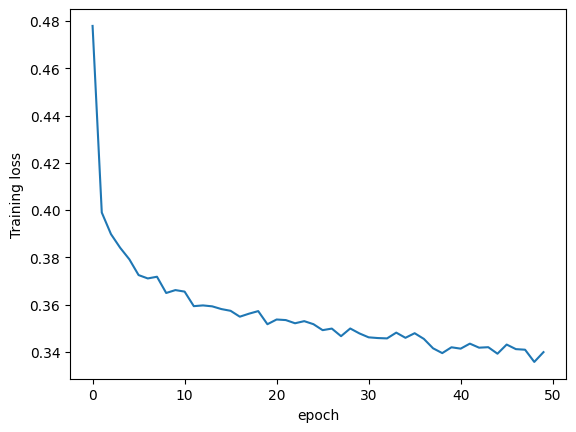

In [58]:
# todo: plot the train and validation loss by epoch
# plot them seperately
plt.plot(train_loss_arr, label="train loss")
plt.xlabel("epoch")
plt.ylabel("Training loss")
plt.show()

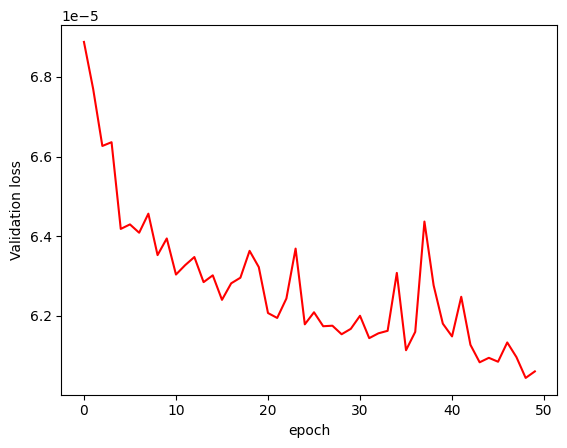

In [59]:
plt.plot(val_loss_arr, label="val loss", color="red")
plt.xlabel("epoch")
plt.ylabel("Validation loss")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

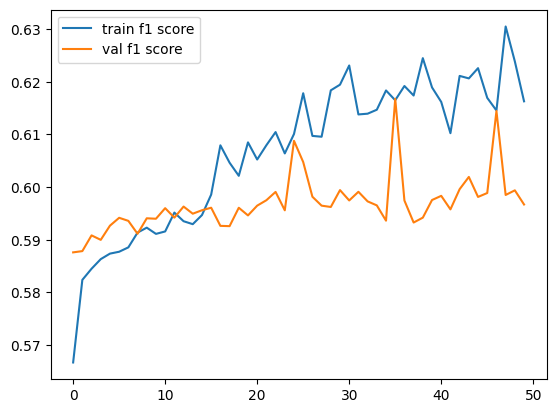

In [60]:
# todo: plot the f1 score by epoch
plt.plot(f1_macro_scores_train, label="train f1 score")
plt.plot(f1_macro_scores_val, label="val f1 score")
plt.legend()
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

Test


100%|██████████| 81/81 [00:00<00:00, 356.09it/s]


Test Loss: 0.33003068264619806	 F1 score macro: 0.5957372179616404
Accuracy: 0.8648126689841638
Macro Average Precision: 0.90594809589223
Macro Average Recall: 0.614612062179023
Micro Average Precision: 0.8648126689841638
Micro Average Recall: 0.8648126689841638
F-1 score macro: 0.5957372179616404
F-1 score micro: 0.8648126689841638


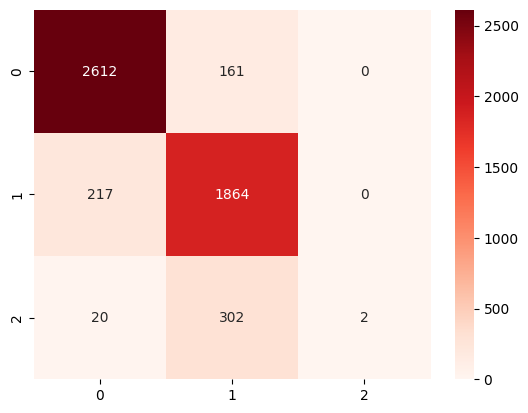

In [66]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns

# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(
    model, criterion, test_loader, test_mode=True
)

print(f"Test Loss: {eval_loss}\t F1 score macro: {f1_score_macro}")
print(f"Accuracy: {accuracy_score(true_labels, predicted_labels)}")
print(
    f"Macro Average Precision: {precision_score(true_labels, predicted_labels, average='macro')}"
)
print(
    f"Macro Average Recall: {recall_score(true_labels, predicted_labels, average='macro')}"
)
print(
    f"Micro Average Precision: {precision_score(true_labels, predicted_labels, average='micro')}"
)
print(
    f"Micro Average Recall: {recall_score(true_labels, predicted_labels, average='micro')}"
)
print(f"F-1 score macro: {f1_score(true_labels, predicted_labels, average='macro')}")
print(f"F-1 score micro: {f1_score(true_labels, predicted_labels, average='micro')}")

# Draw confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [75]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    x = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    x = torch.tensor(x, dtype=torch.float32)
    x = x.to(device)
    x = x.view(x.shape[0], -1)
    predicted_label = model(x)
    predicted_class = predicted_label.argmax(dim=1)
    if predicted_class == 0:
        predicted_class = "cv.CV"
    elif predicted_class == 1:
        predicted_class = "cs.LG"
    elif predicted_class == 2:
        predicted_class = "stat.ML"
    else:
        raise ValueError("Invalid class")
    return predicted_class

In [76]:
predict("hardware and computerc architecture is good")

'cs.LG'

In [78]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [3]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

/Users/amirhossein/Documents/University/MIR/Project/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [4]:
# Already Done! In the previous sections

In [187]:
texts = [" ".join(it) for it in preprocessed_total]
texts[0][:100]

'stereo matching one widely used techniques inferring depth stereo images owing robustness speed beco'

In [188]:
labels

array([0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [66]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test


random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=random_state
)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [193]:
MODEL_NAME = "bert-base-uncased"
device = torch.device(
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

# todo
# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [208]:
# todo
train_encodings, test_encodings, label_train, label_test = train_test_split(
    texts, labels, test_size=0.2, random_state=random_state
)

In [209]:
train_encodings = train_encodings[:10000]
label_train = label_train[:10000]

In [210]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        txt = self.encodings[idx]
        label = self.labels[idx]

        encoding = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            return_tensors="pt",
            max_length=256,
            truncation=True,
            padding="max_length",
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label),
        }

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

In [211]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [212]:
def compute_metrics(pred):
    labels = pred.label_ids
    predictions = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [201]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    greater_is_better=True,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

if os.path.exists("bert_first_model.pt"):
    model.load_state_dict(torch.load("bert_first_model.pt", map_location=device))
    print("Model loaded")
else:
    trainer.train()
    model = trainer.model
    torch.save(model, "bert_first_model.pt")

Model loaded


In [202]:
import torch.nn as nn

# freeze bert weights and then train model_2
model_2 = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

for name, param in model_2.named_parameters():
    if "bert" in name:
        param.requires_grad = False

model_2.classifier = torch.nn.Sequential(
    nn.Linear(model_2.config.hidden_size, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 3),
)

model_2 = model_2.to(device)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    greater_is_better=True,
)

trainer = Trainer(
    model=model_2,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

if os.path.exists("bert_second_model.pt"):
    model_2.load_state_dict(torch.load("bert_second_model.pt", map_location=device))
    print("Model loaded")
else:
    trainer.train()
    model_2 = trainer.model
    torch.save(model_2, "bert_second_model.pt")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Model loaded


## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [213]:
y_pred_transformers = []
y_pred_transformers_2 = []
y_true = []

model = model.to(device)
model_2 = model_2.to(device)

for batch in tqdm(val_loader):
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    y_pred_transformers.extend(outputs.logits.argmax(-1).tolist())
    y_true.extend(labels.tolist())

    with torch.no_grad():
        outputs = model_2(input_ids, attention_mask=attention_mask)

    y_pred_transformers_2.extend(outputs.logits.argmax(-1).tolist())

100%|██████████| 648/648 [06:50<00:00,  1.58it/s]


Accuracy of BERT is: 0.8870111057460164
Accuracy of BERT_2 is: 0.6422984065668759
F1 score(Macro) of BERT is: 0.7513400143036485
F1 score(Micro) of BERT is: 0.8870111057460164
F1 score(Macro) of BERT_2 is: 0.41820940079584673
F1 score(Micro) of BERT_2 is: 0.6422984065668759
Precision score(Macro) of BERT is: 0.765986187851014
Precision score(Micro) of BERT is: 0.8870111057460164
Precision score(Macro) of BERT_2 is: 0.4264979112110225
Precision score(Micro) of BERT_2 is: 0.6422984065668759
Recall score(Macro) of BERT is: 0.7411922027382604
Recall score(Micro) of BERT is: 0.8870111057460164
Recall score(Macro) of BERT_2 is: 0.4324651534992309
Recall score(Micro) of BERT_2 is: 0.6422984065668759
Confusion Matrix of BERT is:


/Users/amirhossein/Documents/University/MIR/Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


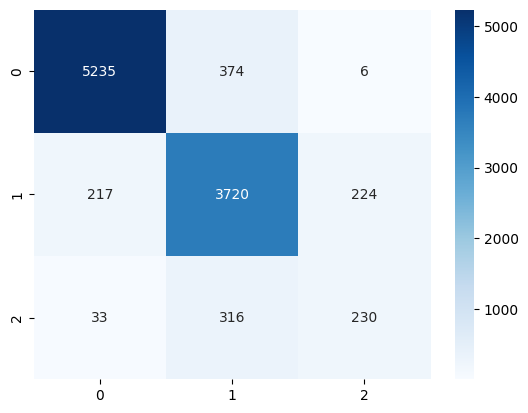

Confusion Matrix of BERT_2 is:


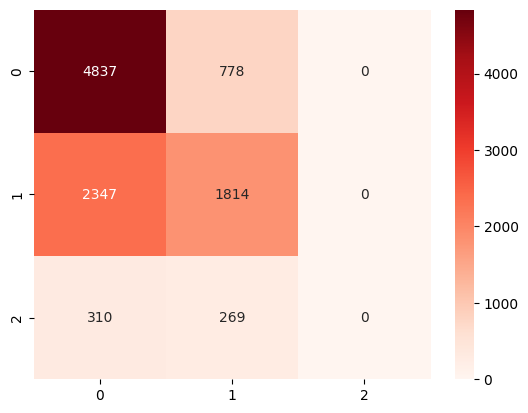

In [216]:
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    f1_score,
    precision_recall_fscore_support,
)

# you can add more cells here if you need
# todo

print("Accuracy of BERT is:", accuracy_score(y_true, y_pred_transformers))
print("Accuracy of BERT_2 is:", accuracy_score(y_true, y_pred_transformers_2))

print(
    "F1 score(Macro) of BERT is:",
    f1_score(y_true, y_pred_transformers, average="macro"),
)
print(
    "F1 score(Micro) of BERT is:",
    f1_score(y_true, y_pred_transformers, average="micro"),
)
print(
    "F1 score(Macro) of BERT_2 is:",
    f1_score(y_true, y_pred_transformers_2, average="macro"),
)
print(
    "F1 score(Micro) of BERT_2 is:",
    f1_score(y_true, y_pred_transformers_2, average="micro"),
)

print(
    "Precision score(Macro) of BERT is:",
    precision_score(y_true, y_pred_transformers, average="macro"),
)
print(
    "Precision score(Micro) of BERT is:",
    precision_score(y_true, y_pred_transformers, average="micro"),
)
print(
    "Precision score(Macro) of BERT_2 is:",
    precision_score(y_true, y_pred_transformers_2, average="macro"),
)
print(
    "Precision score(Micro) of BERT_2 is:",
    precision_score(y_true, y_pred_transformers_2, average="micro"),
)

print(
    "Recall score(Macro) of BERT is:",
    recall_score(y_true, y_pred_transformers, average="macro"),
)
print(
    "Recall score(Micro) of BERT is:",
    recall_score(y_true, y_pred_transformers, average="micro"),
)
print(
    "Recall score(Macro) of BERT_2 is:",
    recall_score(y_true, y_pred_transformers_2, average="macro"),
)
print(
    "Recall score(Micro) of BERT_2 is:",
    recall_score(y_true, y_pred_transformers_2, average="micro"),
)

# Confusion Matrix
print("Confusion Matrix of BERT is:")

sns.heatmap(
    confusion_matrix(y_true, y_pred_transformers), annot=True, fmt="d", cmap="Blues"
)
plt.show()

print("Confusion Matrix of BERT_2 is:")
sns.heatmap(
    confusion_matrix(y_true, y_pred_transformers_2), annot=True, fmt="d", cmap="Reds"
)
plt.show()

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

_Explanation_:

- _Accuracy_:
  
  From the point of accuracy, which is a valid metric, the FastText model gained about 81% accuracy, while the BERT model gained about 88% accuracy. On the other hand, BERT with frozen weights and only a classifier gained about 64% accuracy.

- _Comparison_:
  
  As we mentioned in the accuracy subsection earlier, the BERT model has a higher accuracy from the rest. This is because the BERT model uses transformer architecture and leverages the attention mechanism to learn the context of the words. On the other hand, FastText uses a simple bag of words model and does not consider the context of the words. Therefore, the BERT model has a higher accuracy.
  
  **Note** It is worth mentioning that the reason that BERT with frozen weights does not do well in this case, is that maybe there are some important semantic relations that should be learned by BERT, and the MLP classifier can not do it! This is seen in the fine-tuning process of BERT named `model_1` in the code.

It is obvious that we just trained the models for 2 epochs, and if we do further we may reach better acurracy.

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [217]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    embedd = tokenizer.encode_plus(
        x,
        add_special_tokens=True,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=256,
    )
    embedd = embedd.to(device)

    predicted_class = model(**embedd).logits.argmax(-1).item()
    if predicted_class == 0:
        predicted_class = "cv.CV"
    elif predicted_class == 1:
        predicted_class = "cv.ML"
    elif predicted_class == 2:
        predicted_class = "stat.ML"
    else:
        raise ValueError("Invalid class code")

    return predicted_class

In [219]:
predict("Computer Vision is so interesting, don't you think?!", model)

'cv.CV'

In [ ]:
# It is highly recommended to save your final models
# todo
torch.save(model.state_dict(), "bert_first_model.pt")
torch.save(model_2.state_dict(), "bert_second_model.pt")

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [235]:
df_specific = df.copy()


def create_index():
    doc_index = {}
    index = {}

    counter = 0
    average_title_length = 0
    average_abstract_length = 0

    print("Creating index...")
    for j, row in tqdm(df_specific.iterrows()):
        title = row["preprocessed_title"]
        abstract = row["preprocessed_abstract"]

        paper_id = row.name
        if paper_id not in doc_index:
            doc_index[paper_id] = {}
            doc_index[paper_id]["class"] = predict(texts[counter], model)

    average_title_length += len(title)
    average_abstract_length += len(abstract)
    counter += 1

    print("Working on title...")
    for i, token in tqdm(enumerate(title)):
        if token not in index:
            index[token] = []
        if len(index[token]) == 0 or index[token][-1][0] != paper_id:
            index[token].append([paper_id, [len(title), 0], [len(abstract), 0]])
        title_list = index[token][-1][1]
        title_list[1] += 1

    print("Working on abstract...")
    for i, token in tqdm(enumerate(abstract)):
        if token not in index:
            index[token] = []
        if len(index[token]) == 0 or index[token][-1][0] != paper_id:
            index[token].append([paper_id, [len(title), 0], [len(abstract), 0]])
        abstract_list = index[token][-1][2]
        abstract_list[1] += 1

    average_title_length /= len(doc_index)
    average_abstract_length /= len(doc_index)

    print("Index created!")
    return index, doc_index, [average_title_length, average_abstract_length]


index, doc_index, avg_lengths = create_index()

Creating index...


2500it [01:08, 36.42it/s]


Working on title...


6it [00:00, 157286.40it/s]


Working on abstract...


173it [00:00, 1442573.74it/s]

Index created!


In [236]:
# save the indexes to a file
import pickle

with open("index.pkl", "wb") as f:
    pickle.dump(index, f)

with open("doc_index.pkl", "wb") as f:
    pickle.dump(doc_index, f)

with open("avg_lengths.pkl", "wb") as f:
    pickle.dump(avg_lengths, f)

In [349]:
from collections import defaultdict
from numpy import log10


N = len(doc_index)


def search(
    title_query: str,
    abstract_query: str,
    max_result_count: int,
    method: str = "ltn-lnn",
    weight: float = 0.5,
    should_print=False,
    category="all",
):
    """
    Finds relevant documents to query

    Parameters
    ---------------------------------------------------------------------------------------------------
    max_result_count: Return top 'max_result_count' docs which have the highest scores.
                      notice that if max_result_count = -1, then you have to return all docs

    mode: 'detailed' for searching in title and text separately.
          'overall' for all words, and weighted by where the word apears on.

    method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

    category: 'all' for searching in all documents.
              'category_name' for searching in a specific category with category_name label.

    Returns
    ----------------------------------------------------------------------------------------------------
    list
    Retreived documents with snippet
    """
    # TODO: retun top 'max_result_count' documents for your searched query
    # Tokenize the query into terms

    # title_terms = clean_data(title_query)
    # abstract_terms = clean_data(abstract_query)
    title_terms = title_query.split()
    abstract_terms = abstract_query.split()
    query_terms = title_terms + abstract_terms

    # Calculate the IDF for each term in the query
    doc_freqs = defaultdict(int)
    for term in query_terms:
        for doc_id in index[term]:
            doc_freqs[doc_id[0]] += 1

    idfs = defaultdict(float)
    for term in query_terms:
        # Consider the 0 division problem
        if len(index[term]) == 0:
            idfs[term] = 0
        else:
            idfs[term] = log10(N / len(index[term]))

    # Retrieve the relevant documents for each term in the query
    relevant_docs = defaultdict(list)
    for term in query_terms:
        for doc in index[term]:
            relevant_docs[term].append(doc[0])

    # Calculate the score for each document. the final score is the weighted sum of title and abstract scores
    title_scores = defaultdict(float)
    abstract_scores = defaultdict(float)

    # Calculate tf for each term in the query in each document and store it
    doc_tf_s = {}
    query_tf_s = defaultdict(int)
    for term in query_terms:
        for doc in relevant_docs[term]:
            if doc not in doc_tf_s:
                doc_tf_s[doc] = defaultdict(int)
            doc_tf_s[doc][term] += 1
        query_tf_s[term] += 1

    avgdl = 0
    for doc in df:
        avgdl += len(df["titles"]) + len(df["summaries"])
    avgdl /= N

    if method == "ltc-lnc":
        query_vector = np.zeros(len(title_terms))
        query_norm_factor = 0

        for i in range(len(title_terms)):
            tf = query_tf_s[title_terms[i]]
            if tf == 0:
                query_vector[i] = 0
            else:
                query_vector[i] = 1 + log10(tf)
                query_norm_factor += query_vector[i] ** 2

        query_norm_factor = np.sqrt(query_norm_factor)

        for term in title_terms:
            for doc in relevant_docs[term]:
                document_vector = np.zeros(len(title_terms))
                document_norm_factor = 0

                for i in range(len(title_terms)):
                    tf = doc_tf_s[doc][title_terms[i]]
                    if tf == 0:
                        document_vector[i] = 0
                    else:
                        document_vector[i] = (1 + log10(tf)) * idfs[title_terms[i]]
                        document_norm_factor += document_vector[i] ** 2

                document_norm_factor = np.sqrt(document_norm_factor)
                title_scores[doc] = np.dot(
                    query_vector / query_norm_factor,
                    document_vector / document_norm_factor,
                )

        query_vector = np.zeros(len(abstract_terms))
        query_norm_factor = 0
        for i in range(len(abstract_terms)):
            tf = query_tf_s[abstract_terms[i]]
            if tf == 0:
                query_vector[i] = 0
            else:
                query_vector[i] = 1 + log10(tf)
                query_norm_factor += query_vector[i] ** 2

        query_norm_factor = np.sqrt(query_norm_factor)

        for term in abstract_terms:
            for doc in relevant_docs[term]:
                document_vector = np.zeros(len(abstract_terms))
                document_norm_factor = 0
                for i in range(len(abstract_terms)):
                    tf = doc_tf_s[doc][abstract_terms[i]]
                    if tf == 0:
                        document_vector[i] = 0
                    else:
                        document_vector[i] = (1 + log10(tf)) * idfs[abstract_terms[i]]
                        document_norm_factor += document_vector[i] ** 2

                document_norm_factor = np.sqrt(document_norm_factor)
                abstract_scores[doc] = np.dot(
                    query_vector / query_norm_factor,
                    document_vector / document_norm_factor,
                )

    elif method == "ltn-lnn":
        query_vector = np.zeros(len(title_terms))
        for i in range(len(title_terms)):
            query_vector[i] = 1 + log10(query_tf_s[title_terms[i]] + 1)

        for term in title_terms:
            for doc in relevant_docs[term]:
                document_vector = np.zeros(len(title_terms))
                for i in range(len(title_terms)):
                    document_vector[i] = (
                        1 + log10(doc_tf_s[doc][title_terms[i]] + 1)
                    ) * idfs[title_terms[i]]
                title_scores[doc] = np.dot(query_vector, document_vector)

        query_vector = np.zeros(len(abstract_terms))
        for i in range(len(abstract_terms)):
            query_vector[i] = 1 + log10(query_tf_s[abstract_terms[i]] + 1)

        for term in abstract_terms:
            for doc in relevant_docs[term]:
                document_vector = np.zeros(len(abstract_terms))
                for i in range(len(abstract_terms)):
                    document_vector[i] = (
                        1 + log10(doc_tf_s[doc][abstract_terms[i]] + 1)
                    ) * idfs[abstract_terms[i]]
                abstract_scores[doc] = np.dot(query_vector, document_vector)

    elif method == "okapi25":
        # Setting Hyper parameters (you can change this if you desire!)
        k1 = 1.2
        b = 0.75
        for term in query_terms:
            for doc in relevant_docs[term]:
                for term in title_terms:
                    title_scores[doc] += (
                        log10(N / doc_freqs[doc])
                        * (doc_tf_s[doc][term] * (k1 + 1))
                        / (
                            doc_tf_s[doc][term]
                            + k1 * (1 - b + b * (len(title_terms) / avgdl))
                        )
                    )
                for term in abstract_query:
                    abstract_scores[doc] += (
                        log10(N / doc_freqs[doc])
                        * (doc_tf_s[doc][term] * (k1 + 1))
                        / (
                            doc_tf_s[doc][term]
                            + k1 * (1 - b + b * (len(abstract_terms) / avgdl))
                        )
                    )

    scores = defaultdict(float)
    for doc in title_scores:
        scores[doc] = weight * title_scores[doc] + (1 - weight) * abstract_scores[doc]

    for doc in abstract_scores:
        if doc not in scores:
            scores[doc] = (
                weight * title_scores[doc] + (1 - weight) * abstract_scores[doc]
            )

    # Sort the documents by their score
    result = sorted(scores, key=scores.get, reverse=True)

    if category != "all":
        result = [doc for doc in result if doc_index[doc]["class"] == category]

    # Return the top 'max_result_count' documents
    if max_result_count != -1:
        result = result[:max_result_count]

    if should_print:
        for doc in result:
            print(
                "Paper Number: ",
                doc,
                " Score: ",
                scores[doc],
                " Title Score: ",
                title_scores[doc],
                " Abstract Score: ",
                abstract_scores[doc],
            )
            document_actual = df.iloc[doc]
            # get the title, abstract, and category of the document
            title, abstract, category = (
                document_actual["titles"],
                document_actual["summaries"],
                doc_index[doc]["class"],
            )
            for row in document_actual:
                print("Title: " + title)
                print("Abstract: " + abstract[:250] + "...")
                print("Category: " + category)
                print()
            print("*******************************************************************")

    return result

In [350]:
df_specific.iloc[1]["titles"]

'FUTURE-AI: Guiding Principles and Consensus Recommendations for Trustworthy Artificial Intelligence in Future Medical Imaging'

In [351]:
index.keys()

dict_keys(['multimodal', 'self-supervised', 'learning', 'medical', 'image', 'analysis', 'approaches', 'leverage', 'unlabeled', 'samples', 'acquire', 'generic', 'knowledge', 'different', 'concepts', 'hence', 'allowing', 'annotation-efficient', 'downstream', 'task', 'paper', 'propose', 'novel', 'method', 'leverages', 'multiple', 'imaging', 'modalities', 'introduce', 'puzzle', 'facilitates', 'rich', 'representation', 'learned', 'representations', 'allow', 'subsequent', 'fine-tuning', 'tasks', 'achieve', 'learn', 'modality-agnostic', 'feature', 'embedding', 'confusing', 'data-level', 'together', 'sinkhorn', 'operator', 'formulate', 'solving', 'optimization', 'permutation', 'matrix', 'inference', 'instead', 'classification', 'efficient', 'puzzles', 'varying', 'levels', 'complexity', 'addition', 'also', 'utilize', 'cross-modal', 'generation', 'techniques', 'data', 'augmentation', 'used', 'training', 'words', 'exploit', 'synthetic', 'images', 'pretraining', 'directly', 'order', 'circumvent', 

In [371]:
search(
    "self-supervised medical image analysis approaches",
    "self-supervised medical image analysis approaches",
    max_result_count=3,
    method="ltn-lnn",
    weight=0,
    should_print=True,
    category="cv.CV",
)

['self-supervised', 'medical', 'image', 'analysis', 'approaches', 'self-supervised', 'medical', 'image', 'analysis', 'approaches']
Paper Number:  2499  Score:  42.63709136346947  Title Score:  42.63709136346947  Abstract Score:  42.63709136346947
Title: Multimodal Self-Supervised Learning for Medical Image Analysis
Abstract: Self-supervised learning approaches leverage unlabeled samples to acquire
generic knowledge about different concepts, hence allowing for
annotation-efficient downstream task learning. In this paper, we propose a
novel self-supervised method that leve...
Category: cv.CV

Title: Multimodal Self-Supervised Learning for Medical Image Analysis
Abstract: Self-supervised learning approaches leverage unlabeled samples to acquire
generic knowledge about different concepts, hence allowing for
annotation-efficient downstream task learning. In this paper, we propose a
novel self-supervised method that leve...
Category: cv.CV

Title: Multimodal Self-Supervised Learning for Medi

[2499]

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [90]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


def get_bert_embeddings(text):
    return bert_tokenizer(text, add_special_tokens=True)


get_bert_embeddings("Hello World!")

{'input_ids': [101, 7592, 2088, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [110]:
## ؟ points

from typing import List
from transformers import BertModel


bert_model = BertModel.from_pretrained("bert-base-uncased")
bert_model = bert_model.to(device)


def extract_doc_embedding(doc: str):
    """Extracts embedding vector for a single document

    Parameters
    ----------
    doc : str
        A document

    Returns
    -------
    list
        A list of embedding vectors
    """

    tokens = bert_tokenizer.tokenize(doc)
    tokens = ["CLS"] + tokens + ["SEP"]

    ids = bert_tokenizer.convert_tokens_to_ids(tokens)
    ids = torch.tensor(ids).unsqueeze(0).to(device)

    with torch.no_grad():
        output = bert_model(ids)

    last_layer = output.last_hidden_state
    return last_layer[:, 0, :].cpu().numpy()


def extract_embedding(doc_list: List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """

    embeddings = []
    for doc in tqdm(doc_list):
        embeddings.append(extract_doc_embedding(doc))

    return embeddings

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [111]:
docs_embedding = extract_embedding(texts)

100%|██████████| 51774/51774 [22:29<00:00, 38.35it/s]


In [108]:
docs_embedding[0].shape

(1, 768)

In [ ]:
%pip install pickle-mixin

In [119]:
import pickle
import os

# if bert_embedds exists, load it. else, save it
if os.path.exists("bert_embedds.pkl"):
    with open("bert_embedds.pkl", "rb") as f:
        print("Loading bert embeddings...")
        docs_embedding = pickle.load(f)
        print("Done!")
else:
    with open("bert_embedds.pkl", "wb") as f:
        print("Saving bert embeddings...")
        pickle.dump(docs_embedding, f)
        print("Done!")

Loading bert embeddings...
Done!


In [124]:
docs_embedding = np.array(docs_embedding)

In [125]:
docs_embedding.shape

(51774, 1, 768)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [127]:
## ؟ points

from sklearn.manifold import TSNE
from typing import List

tsne = TSNE(n_components=2, random_state=0)


def convert_to_2d_tsne(emb_vecs: List):
    """Converts each raw embedding vector to 2d vector

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector
    emb_vecs = np.array(emb_vecs)
    emb_vecs = emb_vecs.reshape(emb_vecs.shape[0], -1)
    return tsne.fit_transform(emb_vecs)


docs_embedding_2d = convert_to_2d_tsne(docs_embedding)

In [129]:
docs_embedding_2d.shape

(51774, 2)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


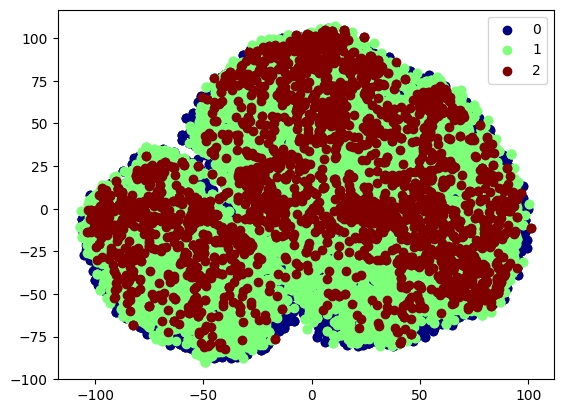

In [135]:
## ؟ points

from typing import List
import matplotlib.pyplot as plt


def plot_docs(emb_vecs_2d: List, labels: List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color.

    unique_labels = np.unique(labels)
    colors = [plt.cm.jet(float(i) / max(unique_labels)) for i in unique_labels]

    for i, u in enumerate(unique_labels):
        xi = [emb_vecs_2d[j, 0] for j in range(len(emb_vecs_2d)) if labels[j] == u]
        yi = [emb_vecs_2d[j, 1] for j in range(len(emb_vecs_2d)) if labels[j] == u]
        plt.scatter(xi, yi, c=colors[i], label=str(u))

    plt.legend()
    plt.show()


plot_docs(docs_embedding_2d, labels)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [362]:
## ؟ points

from typing import List


def cluster_kmeans(emb_vecs: List, n_clusters: int, replacement=False):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    emb_vecs = np.array(emb_vecs)
    emb_vecs = emb_vecs.reshape(emb_vecs.shape[0], -1)
    # TODO: Implement K-means method

    centroids = emb_vecs[
        np.random.choice(emb_vecs.shape[0], n_clusters, replace=replacement)
    ]
    clusters = np.zeros(emb_vecs.shape[0])
    for i in range(100):
        distances = np.linalg.norm(emb_vecs - centroids[:, np.newaxis], axis=2)
        clusters = np.argmin(distances, axis=0)
        for j in range(n_clusters):
            centroids[j] = np.mean(emb_vecs[clusters == j], axis=0)
    return centroids, clusters

In [157]:
def purity(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


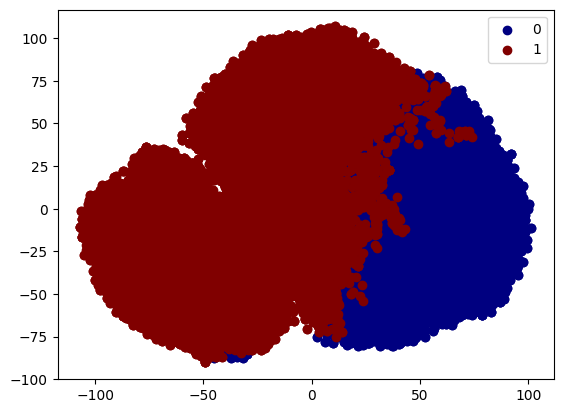

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


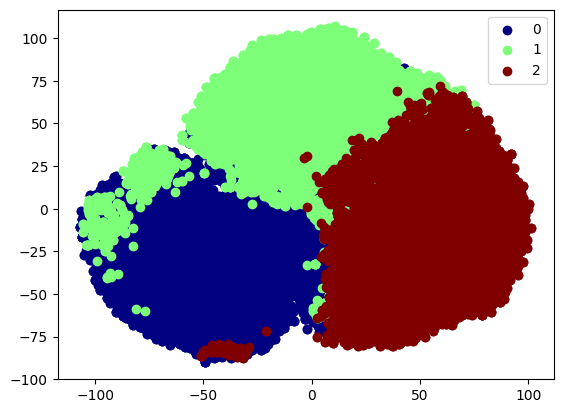

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


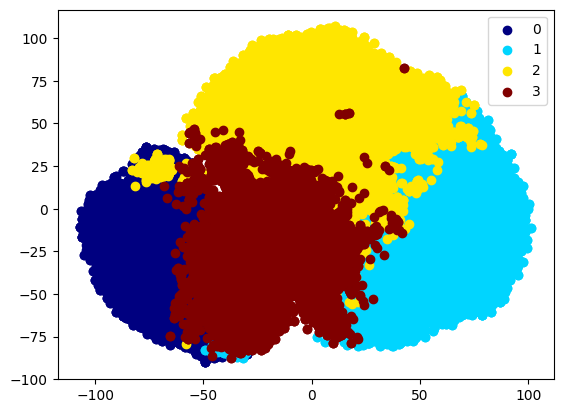

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


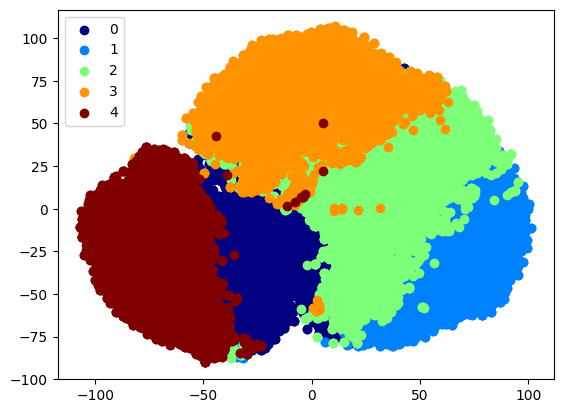

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


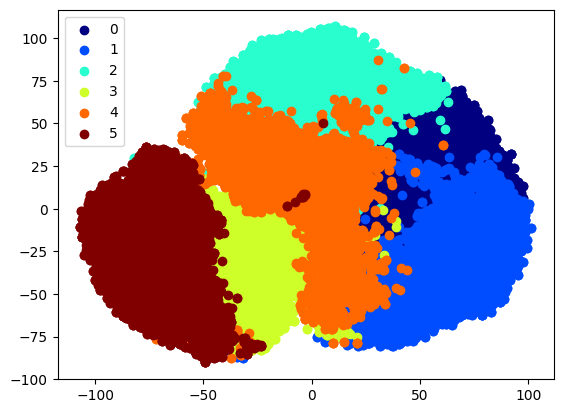

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


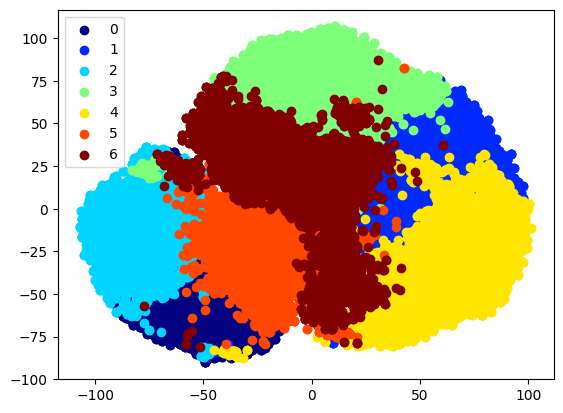

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


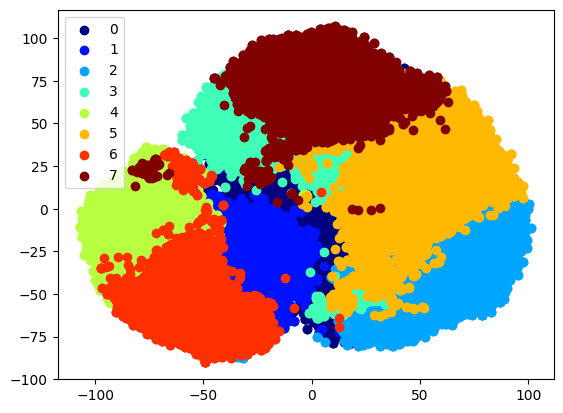

/var/folders/rd/pptsn4g94yn355rms_txgp680000gn/T/ipykernel_6096/1697019279.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=colors[i], label=str(u))


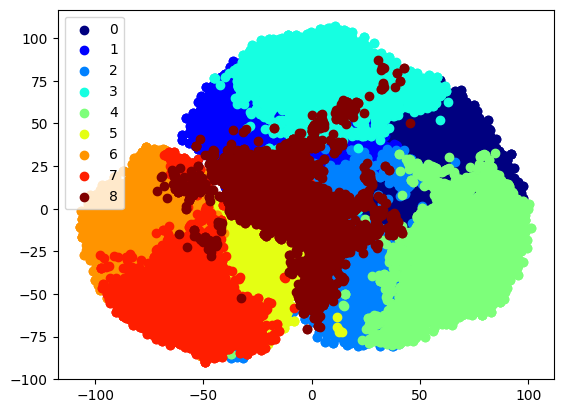

In [158]:
from sklearn.metrics import (
    silhouette_samples,
    silhouette_score,
    normalized_mutual_info_score,
)

# TODO: silhouette analysis
silhoute_scores = []
normalized_mutual_info_scores = []
purities = []
docs_reshaped = docs_embedding.reshape(docs_embedding.shape[0], -1)

for i in range(2, 10):
    centers, cluster_index = cluster_kmeans(docs_embedding, i)
    silhoute_scores.append(silhouette_score(docs_reshaped, cluster_index))
    normalized_mutual_info_scores.append(
        normalized_mutual_info_score(labels, cluster_index)
    )
    purities.append(purity(labels, cluster_index))
    plot_docs(docs_embedding_2d, cluster_index)

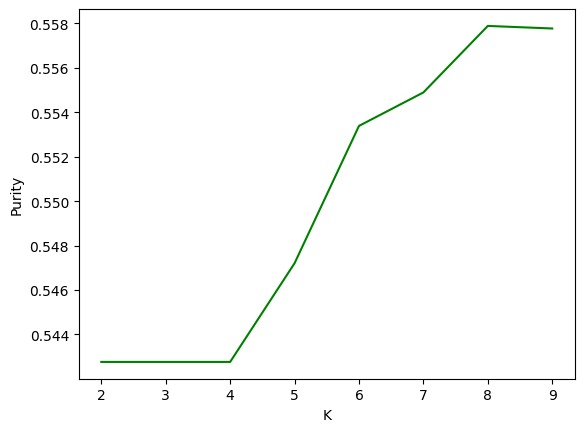

In [159]:
# TODO: plot purity for different values of k
plt.plot(range(2, 10), purities, color='green')
plt.xlabel("K")
plt.ylabel("Purity")
plt.show()

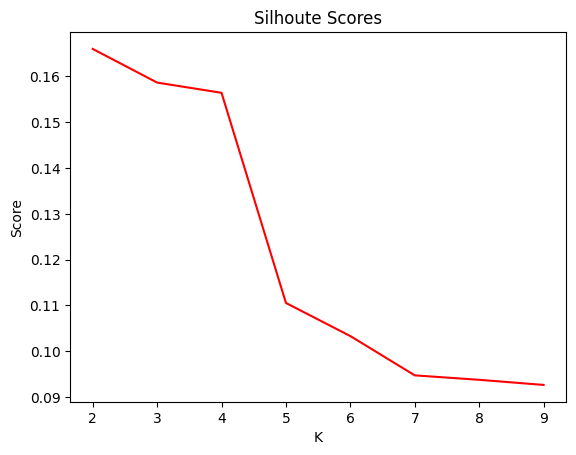

In [162]:
# plot the silhoute scores
plt.plot(range(2, 10), silhoute_scores, color='red')
plt.title("Silhoute Scores")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

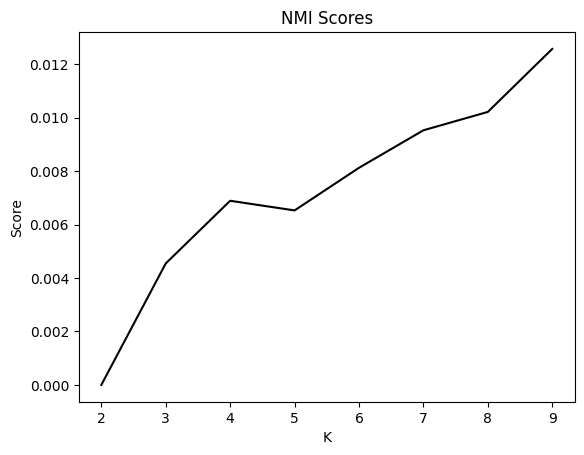

In [164]:
# plot the NMI scores
plt.plot(range(2, 10), normalized_mutual_info_scores, color="black")
plt.title("NMI Scores")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

_Explanation_:

The plots above show that increasing the `K` helps us to get closer to the real clusters. However, the best value for `K` is somewhere around 2 or 3 maybe, if we want to consider only the `silhouette score`.

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

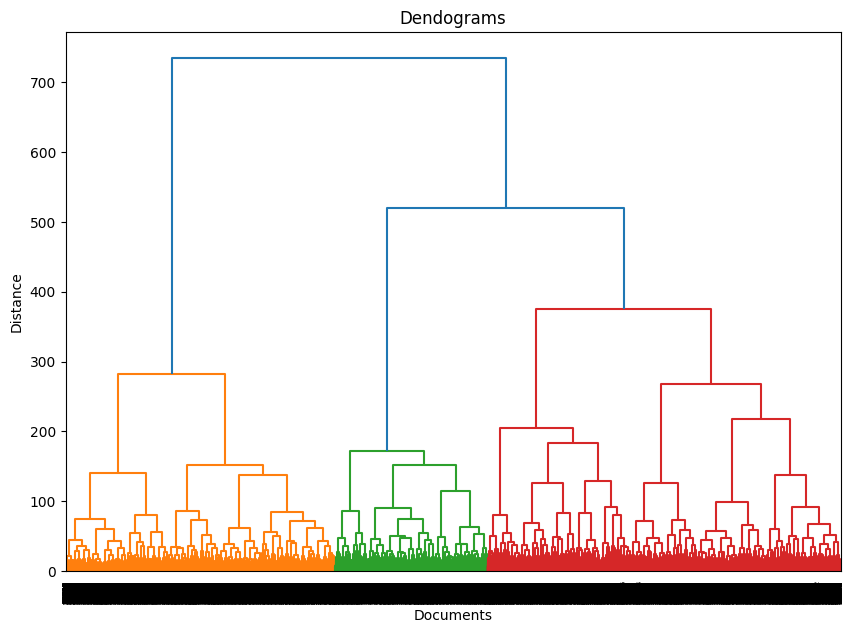

In [166]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# TODO
out = shc.linkage(docs_reshaped, method="ward")

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(out)
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

In [366]:
def embed_docs(doc_ids):
    """Returns embedding vectors for input doc ids

    Parameters
    ----------
    doc_ids : List
        A list of document ids

    Returns
    -------
    list
        A list of embedding vectors
    """
    embeddings = []
    for doc_id in doc_ids:
        index = df.index.get_loc(doc_id)
        embeddings.append(docs_embedding[index])
    return embeddings


def cluster_search(doc_ids, k, should_print=False):
    doc_embeddings = embed_docs(doc_ids)
    doc_embeddings = np.array(doc_embeddings)
    doc_embeddings = doc_embeddings.reshape(doc_embeddings.shape[0], -1)
    centers, cluster_index = cluster_kmeans(doc_embeddings, k, replacement=True)

    results = {}
    for i, doc_id in tqdm(enumerate(doc_ids)):
        cluster_related_id = cluster_index[i]
        if cluster_related_id not in results:
            results[cluster_related_id] = []
        results[cluster_related_id].append(doc_id)

    if should_print:
        for cluster_id, cluster_docs in results.items():
            print(f"Cluster {cluster_id}: {cluster_docs}")

    return results

In [376]:
index.keys()

dict_keys(['multimodal', 'self-supervised', 'learning', 'medical', 'image', 'analysis', 'approaches', 'leverage', 'unlabeled', 'samples', 'acquire', 'generic', 'knowledge', 'different', 'concepts', 'hence', 'allowing', 'annotation-efficient', 'downstream', 'task', 'paper', 'propose', 'novel', 'method', 'leverages', 'multiple', 'imaging', 'modalities', 'introduce', 'puzzle', 'facilitates', 'rich', 'representation', 'learned', 'representations', 'allow', 'subsequent', 'fine-tuning', 'tasks', 'achieve', 'learn', 'modality-agnostic', 'feature', 'embedding', 'confusing', 'data-level', 'together', 'sinkhorn', 'operator', 'formulate', 'solving', 'optimization', 'permutation', 'matrix', 'inference', 'instead', 'classification', 'efficient', 'puzzles', 'varying', 'levels', 'complexity', 'addition', 'also', 'utilize', 'cross-modal', 'generation', 'techniques', 'data', 'augmentation', 'used', 'training', 'words', 'exploit', 'synthetic', 'images', 'pretraining', 'directly', 'order', 'circumvent', 

In [381]:
k = 3
sample_result = search(
    "From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling",
    "From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling",
    max_result_count=15,
    method="ltn-lnn",
    weight=0,
    should_print=False,
)

# print("Before clustering:")
# print(sample_result)

clustered_result = cluster_search(sample_result, k, should_print=False)

/Users/amirhossein/Documents/University/MIR/Project/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amirhossein/Documents/University/MIR/Project/venv/lib/python3.10/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


['self-supervised', 'medical', 'image', 'analysis', 'approaches', 'learning', 'leverage', 'unlabeled', 'knowledge', 'self-supervised', 'medical', 'image', 'analysis', 'approaches', 'learning', 'leverage', 'unlabeled', 'knowledge']


1it [00:00, 32017.59it/s]

Cluster 1: [29053, 29449, 29438, 29131, 29464, 28780, 28903]
Cluster 2: [28553, 28688, 12536, 1176, 29271, 29406, 16860, 22731, 28700]
Cluster 3: [6704, 603, 14298, 29399]


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [167]:
## ؟ points

from typing import List
from sklearn.metrics.pairwise import cosine_similarity


def find_similar_docs(input_doc_index: int, num_of_similar_docs: int, emb_vecs: List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    # TODO: Implement a function to find similar documents to input document.
    input_doc = emb_vecs[input_doc_index]
    distances = cosine_similarity(input_doc.reshape(1, -1), emb_vecs)
    distances = distances.reshape(-1)
    distances[input_doc_index] = -1
    return np.argsort(distances)[::-1][:num_of_similar_docs]


find_similar_docs(5, 5, docs_embedding_2d)

array([27371, 50007, 17709, 10400, 27661])